### **Convolutional Neural Network (CNN )**

Referinte:

https://poloclub.github.io/cnn-explainer/

**1. import the data** 

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the download file 

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-08-07 15:55:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.128, 108.177.12.128, 172.217.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   251MB/s    in 0.4s    

2022-08-07 15:55:05 (251 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



**2. Inspect the data**

In [ ]:
!ls pizza_steak   # List the files in "pizza_steak" 

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through "pizza_steak" directory and list number of files:

#  O varianta de a inspecta si a sti cate imagini sunt intr-un fisier realizand o iteratie: 

for dirpath, dirnames, filenames in os.walk("pizza_steak"): # am definit fisierul prin care vreau sa umblu 
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")




There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Aug  7 15:55 .
drwxr-xr-x 1 root root 4096 Aug  7 15:55 ..
drwxr-xr-x 4 root root 4096 Aug  7 15:55 test
drwxr-xr-x 4 root root 4096 Aug  7 15:55 train


  a) Modalitate de a afla cate imagini sunt intr-un fisier.

In [ ]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak")) # the lenght of how many files are in the "pizza_steak" directory, under the train file, in the steak file 

num_steak_images_train

750

In [ ]:
# To visualize ur images, first let's get the class names programatically 


import pathlib
import numpy as np


data_dir = pathlib.Path("pizza_steak/train/")   # turn the pizza_steak train into a path object 
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names from the subdirectors in the training folder 

print(class_names)

['pizza' 'steak']


  b) Vizualizarea imaginilor

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random 


def view_random_image(target_dir, target_class):

  # Set up the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path 
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")  # Show the sape of the image

  return img 

['1828502.jpg']
Image shape: (342, 512, 3)


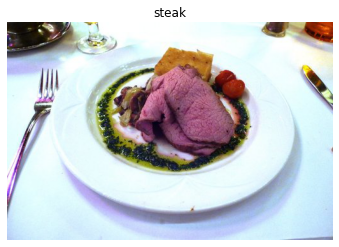

In [ ]:
# View a random iamge from the training dataset 

img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

['765000.jpg']
Image shape: (512, 512, 3)


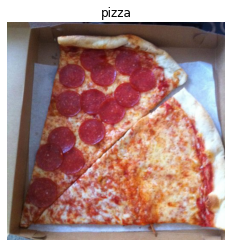

In [ ]:
# Acelasi exemplu si pentru pizza

img2 = view_random_image(target_dir = "pizza_steak/train/",
                         target_class = "pizza")

In [ ]:
# Convertirea imaginei intr-un tensor  => Preprocesarea imaginilor in tensori pentru a fi utilizati ca input-uri pentru reteaua neuronala 

import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(342, 512, 3), dtype=uint8, numpy=
array([[[ 60,  53,  47],
        [ 58,  51,  45],
        [ 54,  46,  43],
        ...,
        [166,  48,   0],
        [165,  49,   2],
        [166,  51,   6]],

       [[ 45,  38,  32],
        [ 43,  36,  30],
        [ 41,  33,  30],
        ...,
        [166,  45,   0],
        [166,  48,   2],
        [168,  51,   7]],

       [[ 34,  27,  21],
        [ 33,  26,  20],
        [ 32,  25,  19],
        ...,
        [171,  49,   2],
        [166,  45,   0],
        [163,  44,   1]],

       ...,

       [[182, 202, 237],
        [185, 205, 240],
        [187, 207, 242],
        ...,
        [125, 132, 158],
        [126, 134, 157],
        [121, 129, 150]],

       [[184, 204, 239],
        [185, 205, 240],
        [186, 206, 243],
        ...,
        [126, 133, 161],
        [128, 135, 161],
        [123, 131, 154]],

       [[184, 204, 241],
        [183, 203, 240],
        [182, 202, 239],
        ...,
        [129, 136, 16

In [ ]:
# View image shape 

img.shape   # returns width, height, colour channels 

(342, 512, 3)

  - **Steps in preprocessing numerical data befour passing it to a neural network**

  1. Turn all data into numbers (neural networks can't handle images);

  2. Make sure all of your tensors are the right shape;

  3. Scale features (normalize or standardize, neural networks tend to prefer normalization)

  

In [ ]:
# Get all the pixels values between 0 and 1 

img/255.

array([[[0.23529412, 0.20784314, 0.18431373],
        [0.22745098, 0.2       , 0.17647059],
        [0.21176471, 0.18039216, 0.16862745],
        ...,
        [0.65098039, 0.18823529, 0.        ],
        [0.64705882, 0.19215686, 0.00784314],
        [0.65098039, 0.2       , 0.02352941]],

       [[0.17647059, 0.14901961, 0.1254902 ],
        [0.16862745, 0.14117647, 0.11764706],
        [0.16078431, 0.12941176, 0.11764706],
        ...,
        [0.65098039, 0.17647059, 0.        ],
        [0.65098039, 0.18823529, 0.00784314],
        [0.65882353, 0.2       , 0.02745098]],

       [[0.13333333, 0.10588235, 0.08235294],
        [0.12941176, 0.10196078, 0.07843137],
        [0.1254902 , 0.09803922, 0.0745098 ],
        ...,
        [0.67058824, 0.19215686, 0.00784314],
        [0.65098039, 0.17647059, 0.        ],
        [0.63921569, 0.17254902, 0.00392157]],

       ...,

       [[0.71372549, 0.79215686, 0.92941176],
        [0.7254902 , 0.80392157, 0.94117647],
        [0.73333333, 0

 ## **Building an end to end CNN Model**

 - Building a concolutional neural network to find patterns in our images, more specificaly: 

 a) Load the images;

 b) Preprocess the images ( normalize them or scale them );

 c) Build a CNN to find patterns in the images;

 d) Fit the CNN to the training data. 
 

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Set random set_seed 

tf.random.set_seed(42)


# Preprocess data (get all of the pixel values between 0 and 1, also called scaling / normalization ). 
# To do this i set up 2 instances of image data generated and i m going to pass it a parameter called "rescale"

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)


# Set up paths to data directories

train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"



# Import data from directories and turn it into batches  ( batches = loturi )

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',       # that's telling our train data that we're importing data in binary format
                                               seed =42 )     # for reproducibility


valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)



# Build a CNN model (same as the Tiny VGG on the CNN explainer website)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation = 'relu',
                           input_shape=(224, 224, 3)),     # this is the input shape our first layer is going to take 
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu',),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')  # 1 la iesire deoarece utilizez clasificare binara
])


# Compile the CNN

model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])   # Uitlizez "accuracy"  deoarece lucrez cu clasificare


# Fit the model 

history_1 = model_1.fit(train_data, 
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 24s 230ms/step - loss: 0.5395 - accuracy: 0.7407 - val_loss: 0.3912 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4150 - accuracy: 0.8193 - val_loss: 0.3341 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 11s 228ms/step - loss: 0.4122 - accuracy: 0.8200 - val_loss: 0.3484 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.3596 - accuracy: 0.8487 - val_loss: 0.2935 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 10s 210ms/step - loss: 0.3391 - accuracy: 0.8540 - val_loss: 0.2848 - val_accuracy: 0.8760


In [ ]:
# Get a model summary

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

# **Reproducrea modelului din capitolul anterior (Clasificarea imagninilor)**

Voi incerca sa utilizez aceeasi arhitectura a primului pas in ceea ce  inseamna realizarea modelului, arhitectura ce a fost utilizata in al 2-lea capitol, in clasificarea imagninilor. 

In [ ]:
# Set random seed

tf.random.set_seed(42)


# 1. Create a model to replicate the TF playground model 

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# 2. Compile the model 

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


# 3. Fit the model 

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))



Epoch 1/5
47/47 [==============================] - 10s 197ms/step - loss: 0.8039 - accuracy: 0.4907 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 203ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 193ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


**Obs ||** Se observa ca "validation_accuracy" in aceasta situatie este 50 %. In clc aceasta arhitectura trebuie ajustata dupa cum urmeaza :


In [ ]:
# Set random seed

tf.random.set_seed(42)


# 1. Create the model 

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])


# 2. Compile the model 

model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


# 3. Fit the model 

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))



Epoch 1/5
47/47 [==============================] - 10s 199ms/step - loss: 4.2420 - accuracy: 0.5953 - val_loss: 1.0442 - val_accuracy: 0.6940
Epoch 2/5
47/47 [==============================] - 10s 214ms/step - loss: 1.2419 - accuracy: 0.6700 - val_loss: 0.6949 - val_accuracy: 0.7500
Epoch 3/5
47/47 [==============================] - 9s 189ms/step - loss: 0.7162 - accuracy: 0.7073 - val_loss: 0.4822 - val_accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 10s 207ms/step - loss: 0.5541 - accuracy: 0.7633 - val_loss: 0.4672 - val_accuracy: 0.7800
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4809 - accuracy: 0.7740 - val_loss: 0.4148 - val_accuracy: 0.8100


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


  **1. Breaking the CNN: Preparing the data**

  **Visualize data**

['187521.jpg']
Image shape: (382, 512, 3)
['12301.jpg']
Image shape: (512, 384, 3)


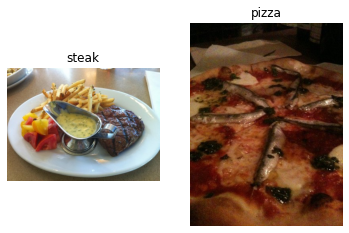

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")


**2. Preprocess the data (prepare it for a model)**

In [ ]:
# Define directory dataset paths

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"



  - Turn the data into **batches** (loturi) (batches = subset of the data set that a model looks at during training ). A batch is  a small subset of data. Rather tham look at all 10000 (for ex. ) iamges at one time, a model might only look at 32 at a time. 

  Reasones:

  a) 10000 images (or more) mihgt not fit into the memory of your processor (GPU);

  b) Trying to learn the paterns in 10000 images at one hit could result in the model not being able to learn very well. 

In [ ]:
# Create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,   # Target direcory
                                            target_size=(224,224),    # Target size of images (height, width)
                                            class_mode='binary',      # type of data you're working with
                                            batch_size=32)            # size of batches to load data into 

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                          target_size=(224,224),
                                          class_mode='binary',
                                          batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch 

images, labels = train_data.next()  # get the "next" batch of images / labels  in train data
len(images), len(labels)


(32, 32)

In [ ]:
# How many batches are ?

len(train_data)     # 1500 / 32 = 46.875 = 47

47

In [ ]:
# Get the first 2 images of the first batch and the shape of first image

images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
# View the first batch of labels:

labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

**3. Create a model**

  - Start with a baseline (A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline. 



In [ ]:
# Make the creating of our model a little easier

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential



In [ ]:
# Create the model ( this will be the baseline , a layer convolutional neural network)

model_4 = tf.keras.Sequential([
    
    # Deorece am importat la inceptu din method-ul layers ce am nevoie, pot rescrie dupa cum urmeaza:
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224,224,3)),    # inout layer (specify input shape)
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')      # output layer (working with binary classification so only 1 output neuron)
])



In [ ]:
# Compile the model 

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])




In [ ]:
# Get a summary

model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the lenghts of training and test data generators

len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model 

history_4 = model_4.fit(train_data,   # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 13s 271ms/step - loss: 1.3160 - accuracy: 0.6653 - val_loss: 0.4646 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4601 - accuracy: 0.8027 - val_loss: 0.3939 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 10s 207ms/step - loss: 0.3443 - accuracy: 0.8587 - val_loss: 0.3639 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 10s 209ms/step - loss: 0.1807 - accuracy: 0.9393 - val_loss: 0.4196 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 10s 217ms/step - loss: 0.0502 - accuracy: 0.9880 - val_loss: 0.5413 - val_accuracy: 0.7780


**Evaluate the model**

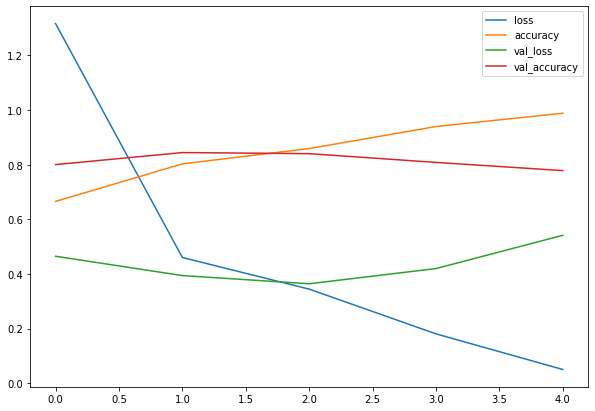

In [ ]:
 # Plot the training curves

import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10,7))


In [ ]:
# Plot the validation and training curves separately 


def plot_loss_curves(history):

  """
  Returns separate loss curves for training and validation metrics
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))  # how many epochs did we run for 

  # Plot loss

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot acccuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_acccuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()



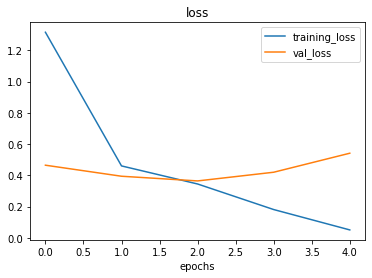

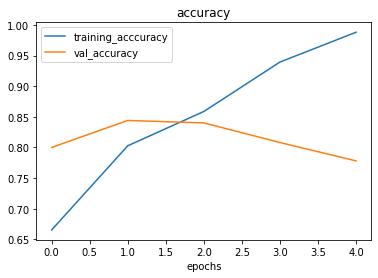

In [ ]:
# Loss and accuracy curves

plot_loss_curves(history_4)

**OBS ||**When a model's validation loss starts to increase, it's likely that the model is overfitting the training dataset. This means it's learning the patterns in the training dataset too well and thus the model's ability to generalize to unseen data will be diminished. ( De exemplu, cand inveti la scoala toate materialele pentru examenul final fara sa pricepi legaturile evenimentelor, tot ceea ce ai facut a fost sa memorezi, iar cand trebuie sa sustii examenul final, vei intalini o intrebarea la care poti raspunde numai daca ai inteles principiile acelor cursuri)

**Reducing Overfiting**

  - Adjust the model parameters: 

   Fitting a machine learning moedel comes in 3 steps: 

  0. Create a baseline (sometghin simple, a simple model to just see if it works in your data.);

  1. Beat teh baseline by overfiting a larger model;

  2. Reduce overfitting.


   **Ways to induce overfitting**

   * increase the number of conv layers (make the neural network deeper);

   * increaset the number of conv filters; 

   * add another dense layer to the output of our flattened layer;

   * etc. 


   **Reduce overfitting**

   * add data augmentation;

   * add regularization layers (such as MaxPool2D);

   * add more data;

   *etc. 


   > **Reducing overfitting is also known as regularization** 


In [ ]:
# Create the model ( this is the new baseline)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

**Obs ||** If a Convolutional layer finds features in an image, MaxPool finds the most important parts of those features. 

  So the input is condensing to a smaller output 

In [ ]:
# Compile the model 

model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])



In [ ]:
# Fit the model 

history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 10s 203ms/step - loss: 0.6316 - accuracy: 0.6367 - val_loss: 0.4599 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 9s 198ms/step - loss: 0.4882 - accuracy: 0.7733 - val_loss: 0.3853 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 10s 217ms/step - loss: 0.4287 - accuracy: 0.8140 - val_loss: 0.3491 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 9s 197ms/step - loss: 0.4163 - accuracy: 0.8193 - val_loss: 0.3619 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 9s 197ms/step - loss: 0.3870 - accuracy: 0.8300 - val_loss: 0.3416 - val_accuracy: 0.8620


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

**OBS ||** In primul strat sunt redusi pixelii de pe margine, apoi, MaxPool layer injumatateste, extragand partile importante din stratul Conv2D. Acest proces se repeta pana la utlimul strat, unde este definit "flatten" moment in care este creat un scalar. 


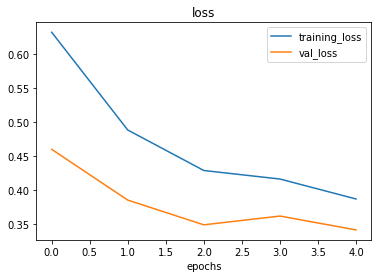

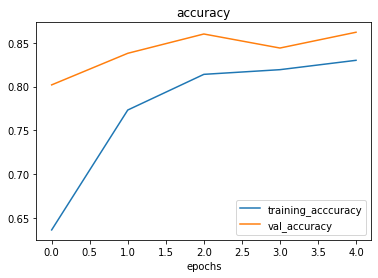

In [ ]:
# Plott loss curves

plot_loss_curves(history_5)

> **Reducing overfitting with data augmentation**

In [ ]:
# Create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,    # how much do you want to rotate an image
                                             shear_range=0.2,       # how much do you want to shear an image
                                             zoom_range=0.2,        # zoom in randomly on an image
                                             width_shift_range=0.2, # move your image around on the x-axis
                                             height_shift_range=0.2, # move your image around on the y-axis 
                                             horizontal_flip=True)     # Do u want to flip an image? 

# Create ImageDataGenerator without data augmentation

train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset

test_datagen = ImageDataGenerator(rescale=1/255.)



**Data augmentation** = is the process of altering the training data, leading it to have more divesity and it turn allowing our model to learn more generalizable paterns. 

Altering might mean: 
  
  - adjusting the rotation of an image,
  - flipping it,
  - cropping it,
  - etc. 

  

In [ ]:
# Import data and augment it from training directory
print("Augmented training data: ")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224,224),
                                                                      batch_size=32,
                                                                      class_mode='binary',
                                                                      shuffle=False)




# Create non-augmented train data batches
print("Non-augmented training data: ")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)


# Create non_augmented test data batches
print("Non-augmented test data: ")
test_data = test_datagen.flow_from_directory(test_dir,
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='binary')
                                          

Augmented training data: 
Found 1500 images belonging to 2 classes.
Non-augmented training data: 
Found 1500 images belonging to 2 classes.
Non-augmented test data: 
Found 500 images belonging to 2 classes.


**OBS ||** Data augmentation is usually only performed on the training data. Using 'ImageDataGenerator' built-in data augmentation parameters our images are left as they are in the directories but are modefied as they're loaded into the model. 

In [ ]:
# Get sample data batches

images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # obs.: labels aren;t augmented. only data (images) 



Showing image number: 31


(-0.5, 223.5, 223.5, -0.5)

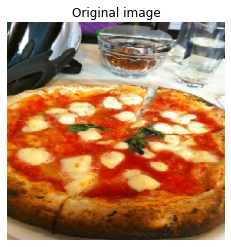

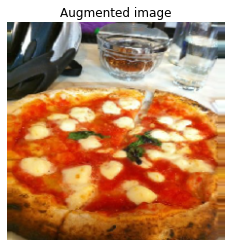

In [ ]:
# Show original image and augmented image

import random

random_number = random.randint(0, 32) # because the batch size is 32
print(f'Showing image number: {random_number}')
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f'Augmented image')
plt.axis(False)



> Build a model and see how it learns on augmented data

In [ ]:
# Create a model ( same as model_5 )

model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])



# Compile the model 

model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


# Fit the model 

history_6 = model_6.fit(train_data_augmented, 
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))



Epoch 1/5
47/47 [==============================] - 24s 500ms/step - loss: 0.7267 - accuracy: 0.4813 - val_loss: 0.6861 - val_accuracy: 0.6320
Epoch 2/5
47/47 [==============================] - 24s 500ms/step - loss: 0.6974 - accuracy: 0.5027 - val_loss: 0.6776 - val_accuracy: 0.5020
Epoch 3/5
47/47 [==============================] - 24s 507ms/step - loss: 0.6942 - accuracy: 0.4933 - val_loss: 0.6771 - val_accuracy: 0.7300
Epoch 4/5
47/47 [==============================] - 24s 518ms/step - loss: 0.6804 - accuracy: 0.6500 - val_loss: 0.6466 - val_accuracy: 0.7260
Epoch 5/5
47/47 [==============================] - 23s 491ms/step - loss: 0.6948 - accuracy: 0.5493 - val_loss: 0.6488 - val_accuracy: 0.7700


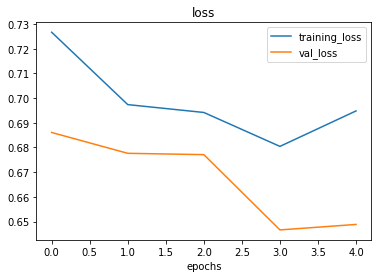

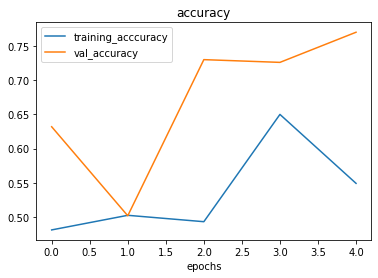

In [ ]:
# Evaluate the loss curves

plot_loss_curves(history_6)

> **Realizarea unui model in care "shuffle=True"**

  - Shuffle the augmented training data and train another model (the same as begore) 

In [ ]:
# Import data and augmented it and shuffle from training directory

train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            class_mode='binary',
                                                                            batch_size=32,
                                                                            shuffle=True)



Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)

model_7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])



# Compile the model 

model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])



# Fit the model 

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 504ms/step - loss: 0.6269 - accuracy: 0.6433 - val_loss: 0.4883 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 23s 492ms/step - loss: 0.5157 - accuracy: 0.7493 - val_loss: 0.3954 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 24s 517ms/step - loss: 0.4661 - accuracy: 0.7847 - val_loss: 0.3685 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 23s 496ms/step - loss: 0.4584 - accuracy: 0.7880 - val_loss: 0.3414 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 23s 494ms/step - loss: 0.4443 - accuracy: 0.8013 - val_loss: 0.3332 - val_accuracy: 0.8540


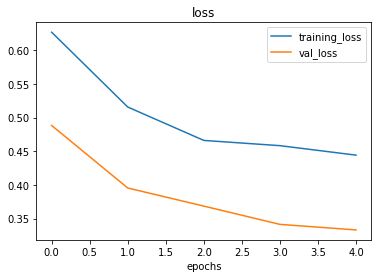

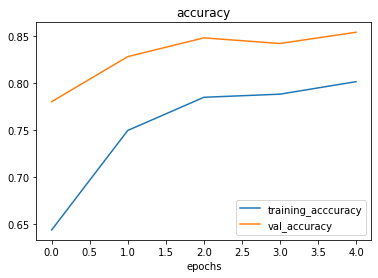

In [ ]:
# Plot_loss_curves

plot_loss_curves(history_7)

**OBS ||** When shuffling training data, the model gets exposed to all different kindes of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then just steak). 

  Since we've already beaten our baseline, there are a few things we could try to improve our model: 

  - INcrease the number of model layers (e.g. add more "Conv2D / MaxPool2D" layers);
  - Increase the number of filters in each convolutional layer ( e.g. fro, 10 to 32 or even 63);
  - Train for longer (more epochs);
  - Find an ideal learning rate;
  - Get more data (give the model more opportunities to learn);
  - Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

###**Making a prediction with my trained model on my own custom data**

--2022-08-07 16:03:45--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.1s    

2022-08-07 16:03:45 (13.2 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

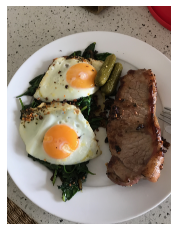

In [ ]:
# View my exmple image
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)


In [ ]:
# Check the shape of image

steak.shape

(4032, 3024, 3)

In [ ]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

**OBS ||** When u train a neural network and u want to make a prediction with it on your own custom data, it's important than your custom data ( or new data) is preprocessed into the same format as the data your model was trained on. 

> Create a function to import an image and resize it to be able to be used with our model

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  """ 
  Reads an image from filename, turns it into a tensor and reshapes it to( img_shape, img_shape, colour_channels )
  """

  # Read in the image
  img = tf.io.read_file(filename)


  # Decode  the read file into a tensor 
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])


  # Rescale the image
  img = img/255.

  return img


In [ ]:
# Load in and preprocess the custom image

steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
# Predict

pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.88724387]], dtype=float32)

> Visualize the image as well as the model's prediction

In [ ]:
# Class namnes

class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# Index the predicted class by rounding the prediction probability  and indexing it on the class names

pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title
  """

  # Imort the target image and  preprocess it 
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class names
  pred_class = class_names[int(tf.round(pred))]

  # PLot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

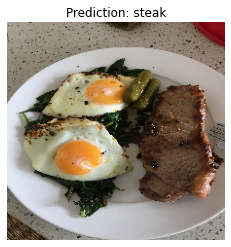

In [ ]:
# Test the model on a custom image 1

pred_and_plot(model_7, "03-steak.jpeg")

--2022-08-07 16:03:48--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.1s    

2022-08-07 16:03:48 (26.8 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



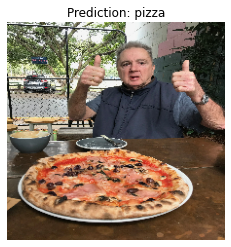

In [ ]:
# Test the model on a custom image 2

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

pred_and_plot(model_7, "03-pizza-dad.jpeg")

=========================================================================================================================================================================================================================================================================================================================================================

### **Multi-class image classification**

1. Prepare the data;
2. Preprocess the data ( get it ready for a model );
3. Create a model ( start with a baseline );
4. Fit the model ( overfit it to make sure it works );
5. Evaluate the model;
6. Adjust different hyperparameters and improve the model ( try to beat baseline / reduce overfiting );
7. Repeat until satisfied. 

**OBS ||** 

Primul model --> binary classification ( Am luat in calcul doar 2 clase de imagini);

Al-2- lea model --> multiclass clasification ( Voi lua in calcul 10 clase de imagini diferite) ;


> 1. Import the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the data

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()




--2022-08-07 16:03:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   206MB/s    in 2.4s    

2022-08-07 16:03:51 (206 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10 classes of food imaged data

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.

> - Set up the train and test directories 

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"


> - Get the class names

In [ ]:
import pathlib
import numpy as np 

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


>  - Visualize the data

['1905628.jpg']
Image shape: (512, 382, 3)


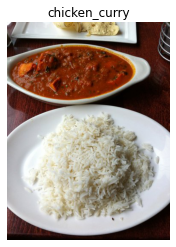

In [ ]:
import random

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

> 2. Preprocess the data ( prepare it for a model )

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


# Load data in from drirectories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")






Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


> 3. Create a model ( start with a baseline)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create a model ( very similar to previous models but actually the same as CNN explainer website)
model_8 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model 
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


In [ ]:
# Fit the model 

history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
235/235 [==============================] - 50s 209ms/step - loss: 2.1862 - accuracy: 0.1939 - val_loss: 2.0308 - val_accuracy: 0.2872
Epoch 2/5
235/235 [==============================] - 47s 202ms/step - loss: 1.9091 - accuracy: 0.3400 - val_loss: 1.8984 - val_accuracy: 0.3464
Epoch 3/5
235/235 [==============================] - 48s 206ms/step - loss: 1.5825 - accuracy: 0.4740 - val_loss: 1.9274 - val_accuracy: 0.3408
Epoch 4/5
235/235 [==============================] - 47s 202ms/step - loss: 0.9823 - accuracy: 0.6848 - val_loss: 2.4480 - val_accuracy: 0.3012
Epoch 5/5
235/235 [==============================] - 49s 207ms/step - loss: 0.3775 - accuracy: 0.8869 - val_loss: 3.3134 - val_accuracy: 0.2772


**OBS ||** Avand in vedere ca lucrez cu 10 clase diferite si fiecare clasa are cate 750 de imagini, valoarea pentru "val_accuracy" daca consideram ca acest model ghisete imaginile, va fi 10 %. In concluzie acest model performeaza de 3 x mai bine decat doar sa ghiceasca. 

> 4. Evaluate the model 

- Evaluate on the test data

In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 11s 145ms/step - loss: 3.3134 - accuracy: 0.2772


[3.31337571144104, 0.27720001339912415]

- Check the model's loss curves

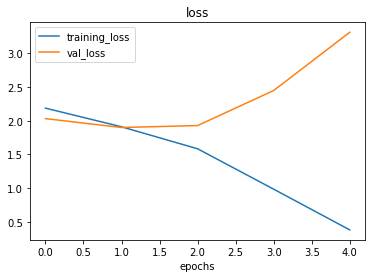

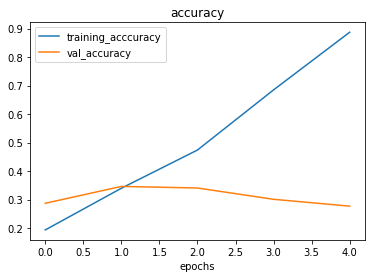

In [ ]:
plot_loss_curves(history_8)

Din prima imagine => Ideal ar fi fost ca ambele caracteristici sa scada, dar in acest caz, val_loss dupa prima epoca incepe sa creasca chiar daca curba training_loss scade. Inseamna ca acest model poate fi supraadaptat (overfitting) pe datele de antrenament. Asta inseamna ca modelul invata prea bine datele de antrenament si nu mai poate generaliza datele de test.

> 5. Adjust the model hyperparameters ( to beat the baseline/reduce overfitting) 

> Fix overfitting. 

* **Get more data** = having more data  gives a model more opportunity to learn diverse patterns;
* **Simplify the model** = if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to reduce number of layers or reduce number of hidden units in layers. 
* **Use data augmentation** = data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** = transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset. 


- a) Simplify the model first

In [ ]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [ ]:
# Remove 2 convolutional layers:
model_9=Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])


# Compile the model 
model_9.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])




In [ ]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 29160)             0         
                                                                 
 dense_13 (Dense)            (None, 10)               

In [ ]:
# Fit the model 

history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 47s 197ms/step - loss: 2.3595 - accuracy: 0.2135 - val_loss: 1.9768 - val_accuracy: 0.3112
Epoch 2/5
235/235 [==============================] - 46s 194ms/step - loss: 1.7876 - accuracy: 0.3899 - val_loss: 1.8743 - val_accuracy: 0.3448
Epoch 3/5
235/235 [==============================] - 46s 197ms/step - loss: 1.4406 - accuracy: 0.5249 - val_loss: 1.9596 - val_accuracy: 0.3400
Epoch 4/5
235/235 [==============================] - 45s 193ms/step - loss: 1.0298 - accuracy: 0.6681 - val_loss: 2.2003 - val_accuracy: 0.3152
Epoch 5/5
235/235 [==============================] - 46s 197ms/step - loss: 0.6357 - accuracy: 0.8100 - val_loss: 2.6300 - val_accuracy: 0.2948


> - Plot the loss curves of model_9

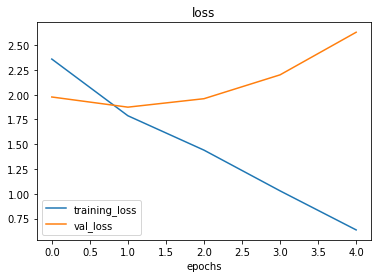

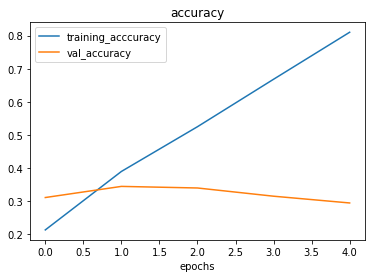

In [ ]:
plot_loss_curves(history_9)

**OBS ||** Eliminand 2 straturi nu am adus nici o imbunatatire

In [ ]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 29160)             0         
                                                                 
 dense_13 (Dense)            (None, 10)               

> - Using data augmentation => tring to reduce overfitting with data augmentation

 - Improve the model's result by using data augmentation.
  
  Ideally, I want to:

  * Reduce overfitting ( get the train and validation loss curves closer );
  * Improve validation accuracy.

In [ ]:
# Create an augmented data generator instance: 

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

Found 7500 images belonging to 10 classes.


> Create another model fit it on the augmented training data of 10 classes.

**OBS ||** Voi clona modelul 8 in ( astfel nu voi rescrie intreg modelul )

Clone_model function -> cloneaza doar arhitectura modelului, restul valorilor fiind resetate

In [ ]:
model_10 = tf.keras.models.clone_model(model_8)

# Compile the model 

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])


# Fit the model

history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 119s 503ms/step - loss: 2.1841 - accuracy: 0.1996 - val_loss: 2.0271 - val_accuracy: 0.2912
Epoch 2/5
235/235 [==============================] - 118s 502ms/step - loss: 2.0768 - accuracy: 0.2639 - val_loss: 1.9492 - val_accuracy: 0.3336
Epoch 3/5
235/235 [==============================] - 121s 514ms/step - loss: 2.0362 - accuracy: 0.2844 - val_loss: 1.9786 - val_accuracy: 0.2884
Epoch 4/5
235/235 [==============================] - 118s 501ms/step - loss: 2.0039 - accuracy: 0.2985 - val_loss: 1.8699 - val_accuracy: 0.3556
Epoch 5/5
235/235 [==============================] - 118s 502ms/step - loss: 1.9835 - accuracy: 0.3029 - val_loss: 1.8247 - val_accuracy: 0.3708


* Comparatie intre modelul 8 si modelul 10

In [ ]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [ ]:
model_10.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

* Model trained on augmented data's loss curves

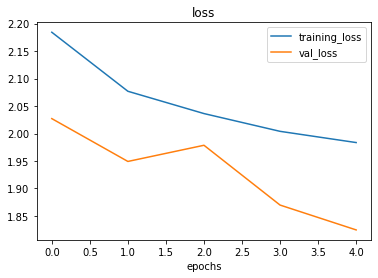

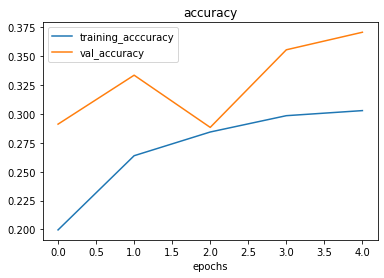

In [ ]:
plot_loss_curves(history_10)

> 6. Repeat untill satisfied 

   Trying to bring the loss curves closer togheter and trying to improve the validation/test accuracy:

  * by running lots of experiments:

    * restructuring the model's architecture ( increasing layers/hidden units);
    * adjust the learning rate;
    * try different methods of data augmentation (adjuust the hyperparameters in the ImageDataGenerator instance );
    * trining for longer;
    * try transfer learning.


### **Making a prediction with the trained model**

Use trained model to make some predictions on my own custom images. 

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Download some custom images

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg


--2022-08-07 16:23:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.1s    

2022-08-07 16:23:42 (32.1 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2022-08-07 16:23:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

**OBS ||** Reconfig pred_and_plot function to work with multi-class images

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class at the title
  """

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:   # ceea ce inseamna ca este multi-class clasification
    pred_class = class_names[tf.argmax(pred[0])]
  else:  # Iau in calcul in aceasta situatie binary-classification 
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)



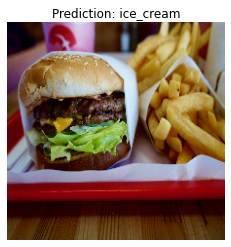

In [ ]:
# Make a prediction using model 10

pred_and_plot(model_10,
              filename='03-hamburger.jpeg',
              class_names=class_names)

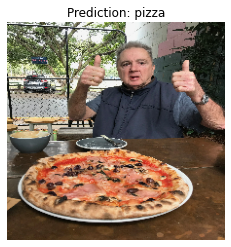

In [ ]:
pred_and_plot(model_10,
              filename='03-pizza-dad.jpeg',
              class_names=class_names)

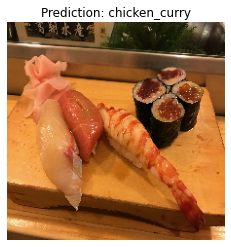

In [ ]:
pred_and_plot(model_10,
              filename='03-sushi.jpeg',
              class_names=class_names)

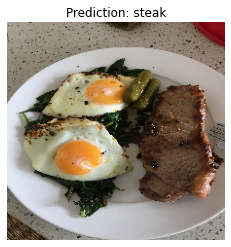

In [ ]:
pred_and_plot(model_10,
              filename='03-steak.jpeg',
              class_names=class_names)

### **Saving and loading the trained CNN model**

Save the model 

In [ ]:
model_10.save("saved_trained_model_10")

Load in a trained model and evaluate it 

In [ ]:
loaded_model_10 = tf.keras.model.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

AttributeError: ignored

Compare the loaded model with the existing model 

In [ ]:
model_10.evaluate(test_data)